In [24]:
!pip install scikeras

Import of necessary libraries for the customer churning task.

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import tensorflow as tf
import torch
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from scikeras.wrappers import KerasClassifier
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.model_selection import GridSearchCV


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read the dataset.

In [27]:
telecom_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CustomerChurn_dataset.csv')

In [28]:
telecom_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Displays the first 5 parts of the dataset.

In [29]:
telecom_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


This block of code below visualizes the distribution of the 'Churn' variable in the 'telecom_df' dataset using a count plot.

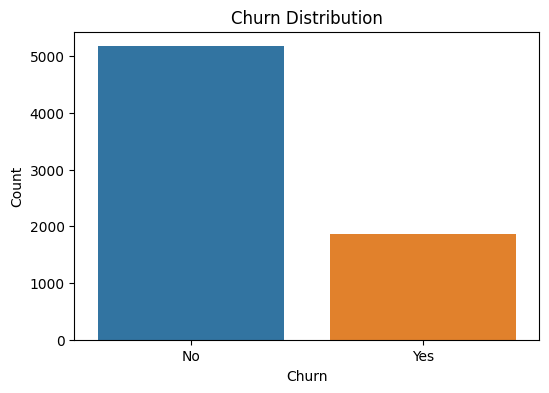

In [30]:

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=telecom_df)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

Visualizinging churn rates in a telecommunications dataset based on senior citizenship.

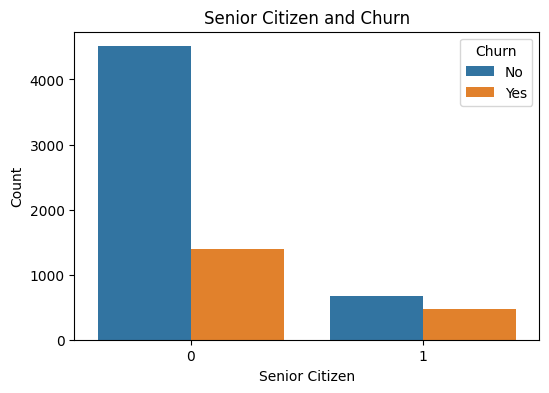

In [31]:

plt.figure(figsize=(6, 4))
sns.countplot(x='SeniorCitizen', hue='Churn', data=telecom_df)
plt.title('Senior Citizen and Churn')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.show()


 Chi-square test for SeniorCitizen and Churn

In [32]:
from scipy.stats import chi2_contingency

senior_churn_crosstab = pd.crosstab(telecom_df['SeniorCitizen'], telecom_df['Churn'])
chi2, p, _, _ = chi2_contingency(senior_churn_crosstab)
print(f"Chi-square p-value for SeniorCitizen and Churn: {p}")

Chi-square p-value for SeniorCitizen and Churn: 1.510066805092378e-36


Code to drop customerID column from the dataset.

In [33]:
columns_to_drop =['customerID']
telecom_df = telecom_df.drop(columns = columns_to_drop, axis= 1)

The code converts categorical data in the `telecom_df` DataFrame into numerical labels using label encoding.

In [34]:
categorical_columns = telecom_df.select_dtypes(include=['object']).columns.tolist()

label_encoder = LabelEncoder()

for col in categorical_columns:
    telecom_df[col] = label_encoder.fit_transform(telecom_df[col])

telecom_df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


The code separates a dataset (`telecom_df`) into a set of features (`X`) excluding the 'Churn' column, and a target variable (`Y`) representing the 'Churn' column specifically for analytical purposes.

In [35]:
X = telecom_df.drop('Churn',axis=1)
Y = telecom_df['Churn']

This code  is training a Random Forest classifier using the features (X) and target variable (Y) to create a predictive model.

In [36]:

rf_classifier = RandomForestClassifier()

rf_classifier.fit(X, Y)


RandomForestClassifier()

This code identifies and displays the top 10 most important features along with their importances by a trained Random Forest classifier.

In [37]:

feature_importances = rf_classifier.feature_importances_


importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})


importance_df = importance_df.sort_values('Importance', ascending=False)

top_10_features = importance_df['Feature'].head(10).values

top_10_importances = importance_df.head(10)
print(top_10_importances)



             Feature  Importance
17    MonthlyCharges    0.176614
4             tenure    0.174682
18      TotalCharges    0.169225
14          Contract    0.078457
16     PaymentMethod    0.052171
8     OnlineSecurity    0.051489
11       TechSupport    0.043582
9       OnlineBackup    0.029617
0             gender    0.027114
15  PaperlessBilling    0.025068


This code generates a horizontal bar plot that shows the 10 feature importances aiding in visualizing the importance of different features in a model or dataset.

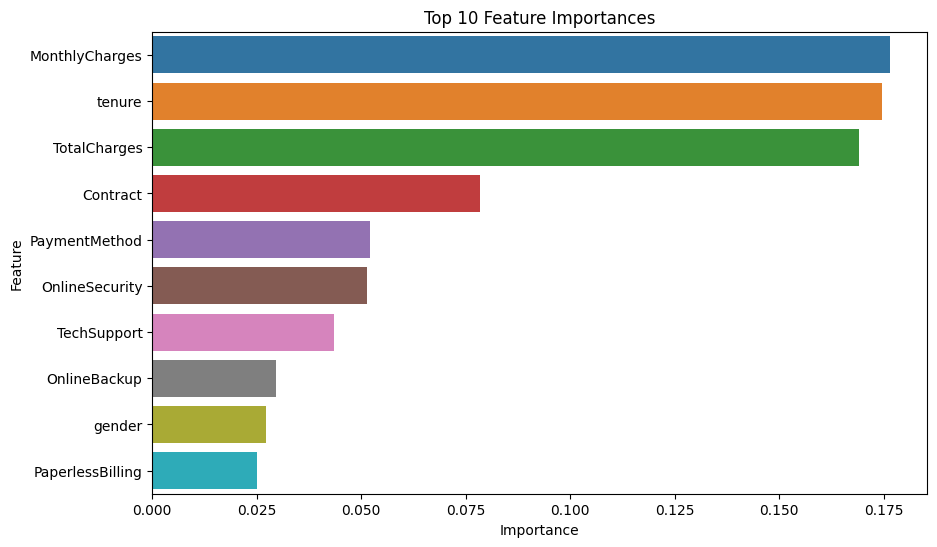

In [38]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_importances)
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


This code selects the 10 important features from a dataframe storing feature importances and creates a new dataset (X_top_10) containing only these selected features.

In [39]:

top_10_features = importance_df['Feature'].head(10).tolist()


X_top_10 = X[top_10_features]




This code scales the features in X_top_10 using StandardScaler to ensure each feature has a mean of 0 and a standard deviation of 1, preparing the data for machine learning models sensitive to feature scaling.

In [40]:

scaler = StandardScaler()


X_scaled = scaler.fit_transform(X_top_10)

X_scaled = pd.DataFrame(X_scaled, columns=X_top_10.columns)

This code defines a function to create a multi-layer perceptron model using Keras, allowing for customization of optimizer, loss function, and metrics, and then creates a Keras classifier using this defined model architecture.

In [41]:


def create_mlp_model(input_shape=X_train.shape[1], optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']):
    inputs = Input(shape=(input_shape,))
    hidden1 = Dense(128, activation='relu')(inputs)
    hidden2 = Dense(64, activation='relu')(hidden1)
    output = Dense(1, activation='sigmoid')(hidden2)

    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    return model

mlp_classifier = KerasClassifier(build_fn=create_mlp_model, verbose=0)



This code splits the dataset into training and testing sets, scaling the features (X) and assigning corresponding target variables (Y), printing the shapes of the resulting train-test split datasets.

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)


print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (5634, 10)
Shape of X_test: (1409, 10)
Shape of Y_train: (5634,)
Shape of Y_test: (1409,)


This code defines a parameter grid specifying different values for the number of epochs and batch sizes to explore during hyperparameter tuning for the machine learning model.

In [43]:


param_grid = {
    'epochs': [10, 20, 30],
    'batch_size': [16, 32, 64],


This code performs a grid search with cross-validation to systematically explore a set of hyperparameters for the MLP classifier to determine the best combination for model performance based on accuracy.

In [44]:

grid_search = GridSearchCV(estimator=mlp_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

GridSearchCV(cv=3,
             estimator=KerasClassifier(build_fn=<function create_mlp_model at 0x7d6de3175c60>, verbose=0),
             param_grid={'batch_size': [16, 32, 64], 'epochs': [10, 20, 30]},
             scoring='accuracy')

This code displays the best parameters and their corresponding best score achieved through a grid search performed in machine learning model tuning.

In [45]:

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'batch_size': 64, 'epochs': 10}
Best Score: 0.7955271565495208


This code evaluates the performance of the best-tuned MLP model on a test set, computing various classification metrics like accuracy, precision, recall, F1 score, ROC AUC score, and AUC score for model assessment.

In [46]:
best_mlp_model = grid_search.best_estimator_

Y_pred = best_mlp_model.predict(X_test)


accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred)
auc_score = roc_auc_score(Y_test, Y_pred)



print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8055358410220014
Precision: 0.6622950819672131
Recall: 0.5415549597855228
F1 Score: 0.5958702064896755
ROC AUC Score: 0.7210670551823366


This code saves the trained best MLP model and a scaler object into separate files using joblib for deployment.


In [47]:
import joblib

In [48]:

joblib.dump(best_mlp_model, 'best_mlp_model.pkl')


['best_mlp_model.pkl']

In [49]:

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']